In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


dataset1 = pd.read_csv('NN dataset.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
dataset1.head()

,Input,Output
0,1,13
1,2,25
2,3,37
3,4,49
4,5,61


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Name: Pranavesh Saikumar
# Register Number: 212223040149
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 12)
        self.fc3 = nn.Linear(12, 1)
        self.relu = nn.ReLU()
        self.history = {'loss':[]}

  def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [ ]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001)

In [ ]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai_brain(X_train), y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())

        if epoch % 200 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch 0, Loss: 18762.12890625
Epoch 200, Loss: 17726.841796875
Epoch 400, Loss: 15447.16015625
Epoch 600, Loss: 12055.359375
Epoch 800, Loss: 8073.75732421875
Epoch 1000, Loss: 4419.6748046875
Epoch 1200, Loss: 2148.250244140625
Epoch 1400, Loss: 1481.900146484375
Epoch 1600, Loss: 1181.12353515625
Epoch 1800, Loss: 829.5164794921875


In [ ]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 584.946899


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

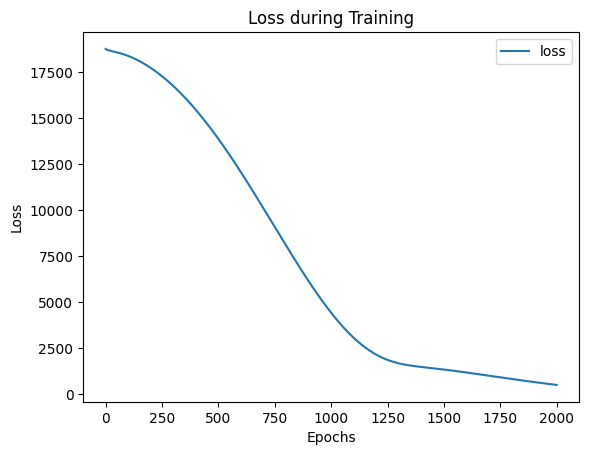

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[18]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 192.14271545410156
